In [5]:
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Model
from keras.layers import Dense, Input


In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

11490434/11490434 [==============================] - 0s 0us/step


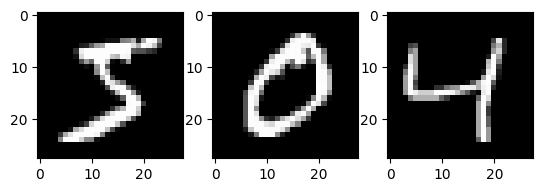

In [12]:
for i in range (0,3):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train[i].reshape((28,28)),'gray')

In [3]:
#normalisation

x_train = x_train.astype('float32') / 255.0 
x_test = x_test.astype('float32') / 255.0

In [4]:
# Matrix to vector 
x_train1 = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) 
x_test1 = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


print(x_train1.shape)
print(x_test1.shape)

(60000, 784)
(10000, 784)


In [9]:
Input_size = 784
Number_Neuron_Hidden_Layer = 128 
code_size = 32 

Input_Layer = Input(shape=(Input_size,))
Hidden_Encoder = Dense(Number_Neuron_Hidden_Layer, activation='relu')(Input_Layer)
code = Dense(code_size, activation='relu')(Hidden_Encoder)
Hidden_Decoder = Dense(Number_Neuron_Hidden_Layer, activation='relu')(code)
Output_Layer = Dense(Input_size, activation='sigmoid')(Hidden_Decoder) # Output should be between 0 and 1 as the input : normalization

autoencoder = Model(Input_Layer, Output_Layer)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') 
autoencoder.fit(x_train1, x_train1, epochs=3) 

Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1364
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0981
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0930


In [10]:
image_prediction = autoencoder.predict(x_test1)

313/313 [==============================] - 1s 2ms/step


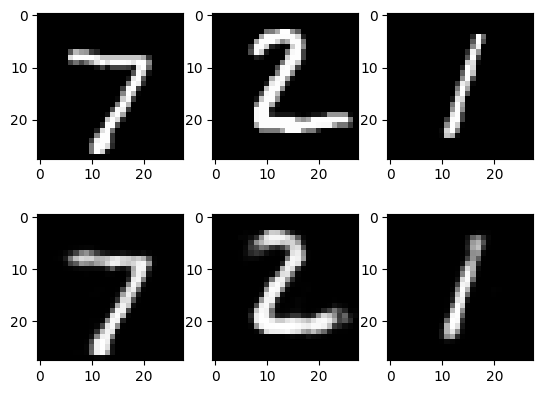

In [11]:
for i in range (0,3):
    plt.subplot(2,3,i+1)
    plt.imshow(x_test1[i].reshape((28,28)),'gray')
    plt.subplot(2,3,i+4)
    plt.imshow(image_prediction[i].reshape(28, 28),'gray')